# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Nanda Safiq Alfiansyah
- **Email:** 2133401
- **ID Dicoding:** Nanda Safiq Alfiansyah


## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan cuaca (weather situation)?
- Bagaimana distribusi penjualan sepeda pada rentang waktu A hingga B?

## 1. Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## 2. Data Wrangling

###2.1. Gathering Data

2.1.1. day

In [2]:
url = "https://drive.google.com/file/d/1wpz87P81pyMu_8fhqI8huwIJuEp60jbX/view?usp=sharing"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
day_df = pd.read_csv(download_url)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


2.1.2. hour


In [3]:
url = "https://drive.google.com/file/d/14oE5I_9y00Bn0wvC0XMXCrATpTbe8ekU/view?usp=drive_link"
file_id = url.split('/')[-2]
download_url = f'https://drive.google.com/uc?export=download&id={file_id}'
hour_df = pd.read_csv(download_url)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 3. Assessing Data

In [4]:
# Check info and missing values for day_df
print("Day DataFrame Info:")
print(day_df.info())
print("\nMissing values in day_df:")
print(day_df.isnull().sum())

# Check info and missing values for hour_df
print("\nHour DataFrame Info:")
print(hour_df.info())
print("\nMissing values in hour_df:")
print(hour_df.isnull().sum())

# Check for duplicates
print("\nDuplicate rows in day_df:", day_df.duplicated().sum())
print("Duplicate rows in hour_df:", hour_df.duplicated().sum())

# Check descriptive statistics
print("\nDescriptive statistics for day_df:")
print(day_df.describe())

Day DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Missing values in day_df:
instant       0
dteday        0
season   

### 4. Cleaning Data

In [5]:
# Convert date columns to datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Map categorical values to meaningful labels
# Season mapping
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].map(season_map)
hour_df['season'] = hour_df['season'].map(season_map)

# Weather situation mapping
weather_map = {
    1: 'Clear/Few clouds',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice/Snow'
}
day_df['weathersit'] = day_df['weathersit'].map(weather_map)
hour_df['weathersit'] = hour_df['weathersit'].map(weather_map)

# Weekday mapping
weekday_map = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}
day_df['weekday'] = day_df['weekday'].map(weekday_map)
hour_df['weekday'] = hour_df['weekday'].map(weekday_map)

# Working day mapping
day_df['workingday'] = day_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend/Holiday')
hour_df['workingday'] = hour_df['workingday'].apply(lambda x: 'Working Day' if x == 1 else 'Weekend/Holiday')

# Holiday mapping
day_df['holiday'] = day_df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')
hour_df['holiday'] = hour_df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Non-Holiday')

# Check cleaned data
print(day_df.head())
print(hour_df.head())

   instant     dteday  season  yr  mnth      holiday    weekday  \
0        1 2011-01-01  Spring   0     1  Non-Holiday   Saturday   
1        2 2011-01-02  Spring   0     1  Non-Holiday     Sunday   
2        3 2011-01-03  Spring   0     1  Non-Holiday     Monday   
3        4 2011-01-04  Spring   0     1  Non-Holiday    Tuesday   
4        5 2011-01-05  Spring   0     1  Non-Holiday  Wednesday   

        workingday        weathersit      temp     atemp       hum  windspeed  \
0  Weekend/Holiday       Mist/Cloudy  0.344167  0.363625  0.805833   0.160446   
1  Weekend/Holiday       Mist/Cloudy  0.363478  0.353739  0.696087   0.248539   
2      Working Day  Clear/Few clouds  0.196364  0.189405  0.437273   0.248309   
3      Working Day  Clear/Few clouds  0.200000  0.212122  0.590435   0.160296   
4      Working Day  Clear/Few clouds  0.226957  0.229270  0.436957   0.186900   

   casual  registered   cnt  
0     331         654   985  
1     131         670   801  
2     120        122

## 5. Exploratory Data Analysis (EDA)

### Explore ...

 5.1 Univariate Analysis (Numerical)

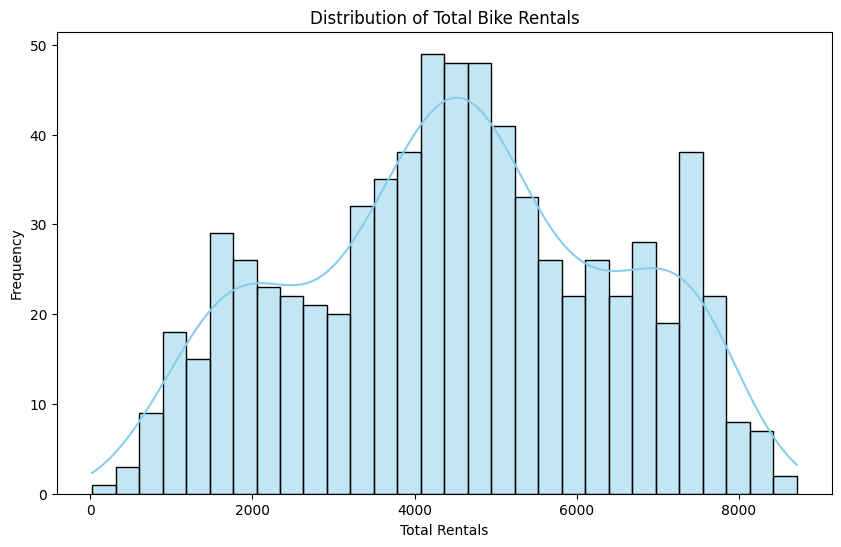

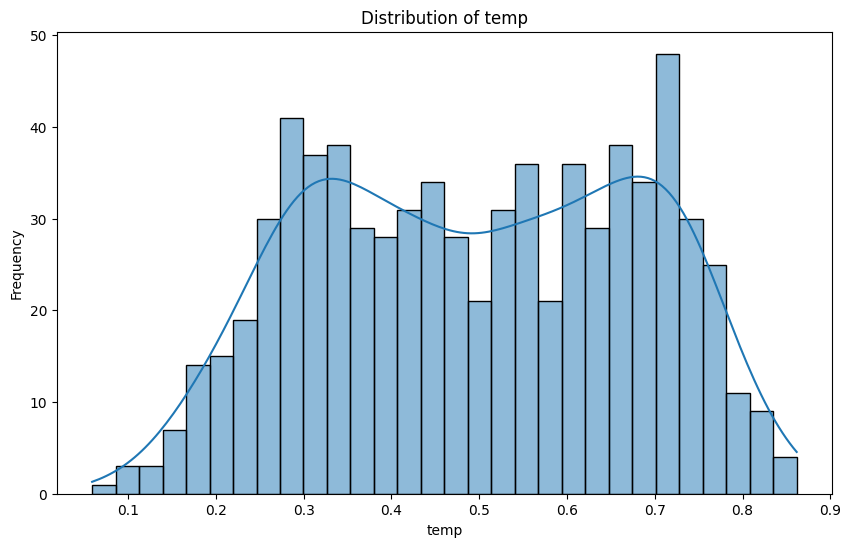

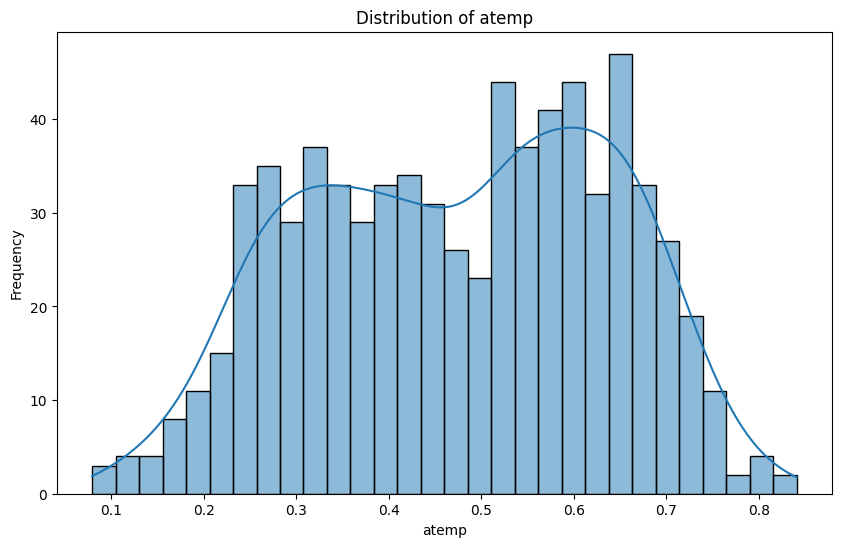

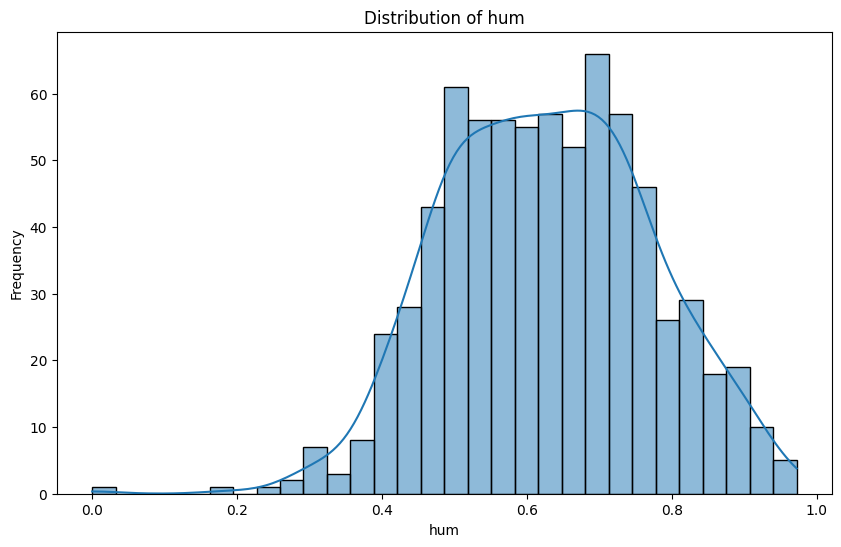

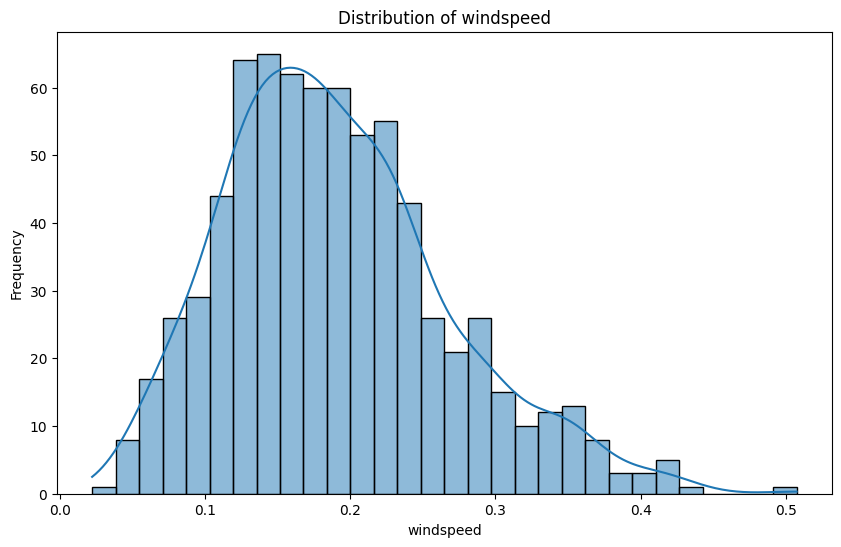

In [6]:
# Distribusi total penyewaan sepeda
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Bike Rentals')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.show()

# Cek distribusi fitur numerik lainnya
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']

for col in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(day_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

5.2. Univariate Analysis (Categorical)

<ipython-input-7-36753967125b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=day_df, palette='pastel')


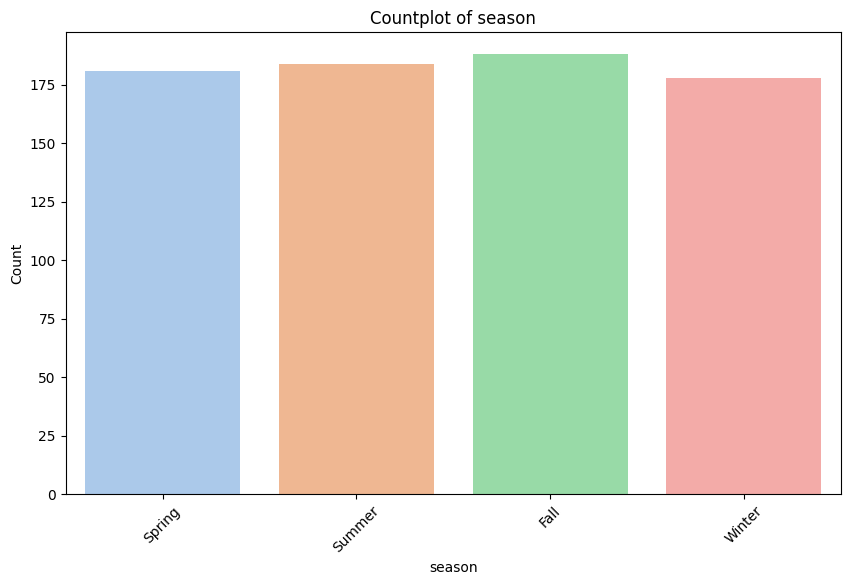

<ipython-input-7-36753967125b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=day_df, palette='pastel')


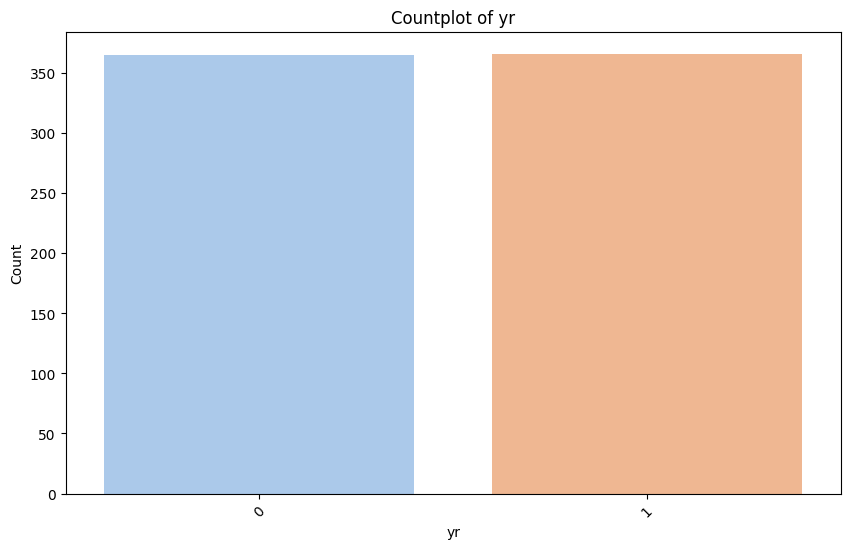

<ipython-input-7-36753967125b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=day_df, palette='pastel')


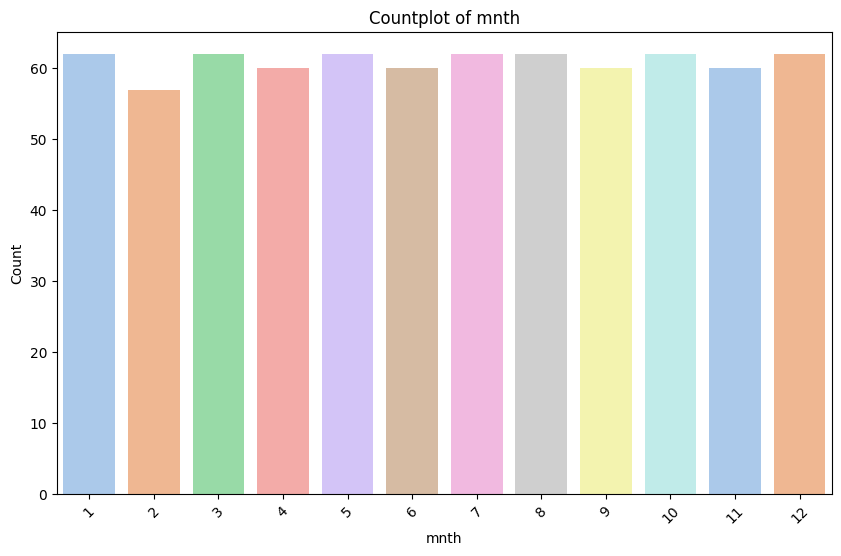

<ipython-input-7-36753967125b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=day_df, palette='pastel')


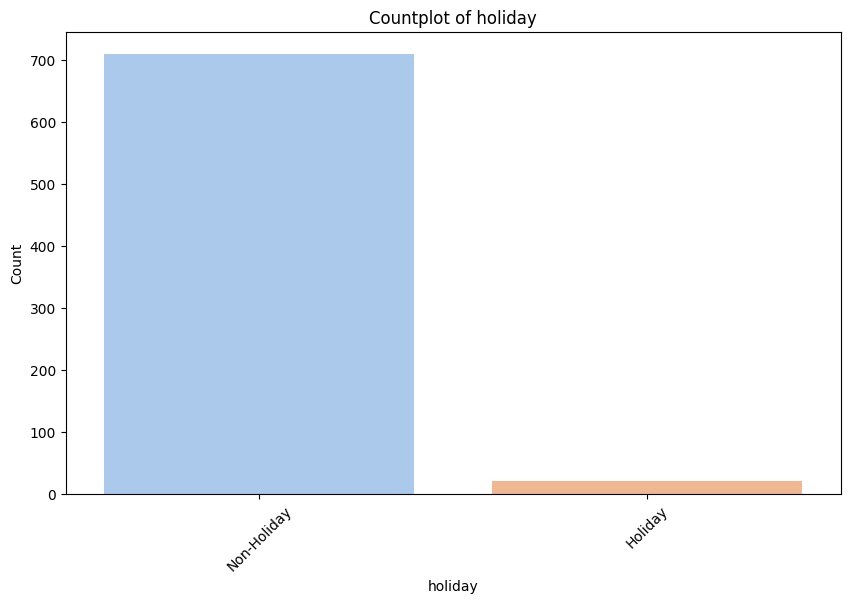

<ipython-input-7-36753967125b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=day_df, palette='pastel')


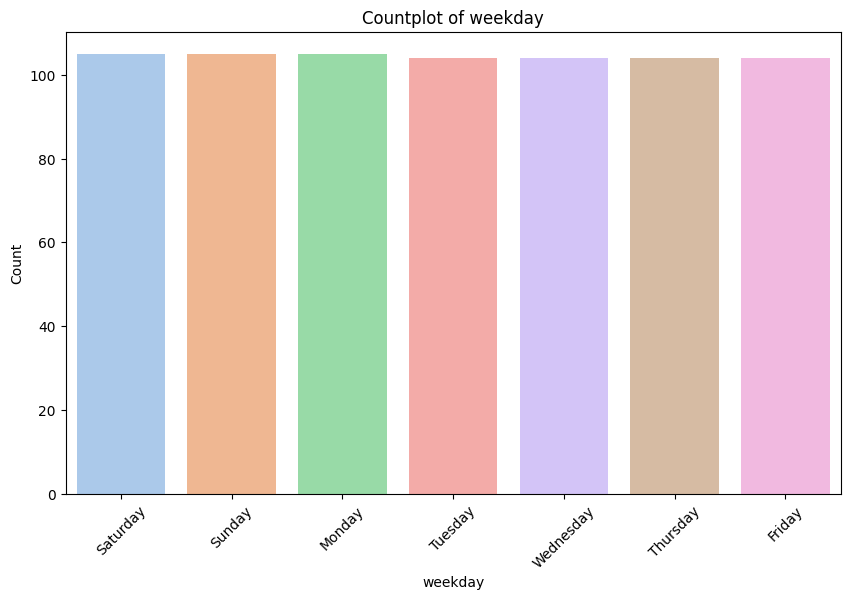

<ipython-input-7-36753967125b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=day_df, palette='pastel')


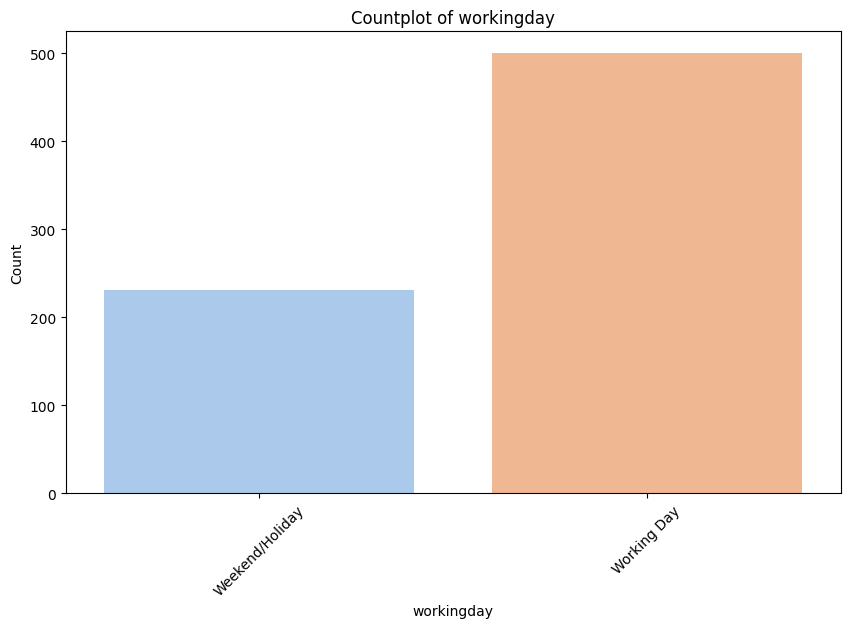

<ipython-input-7-36753967125b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=day_df, palette='pastel')


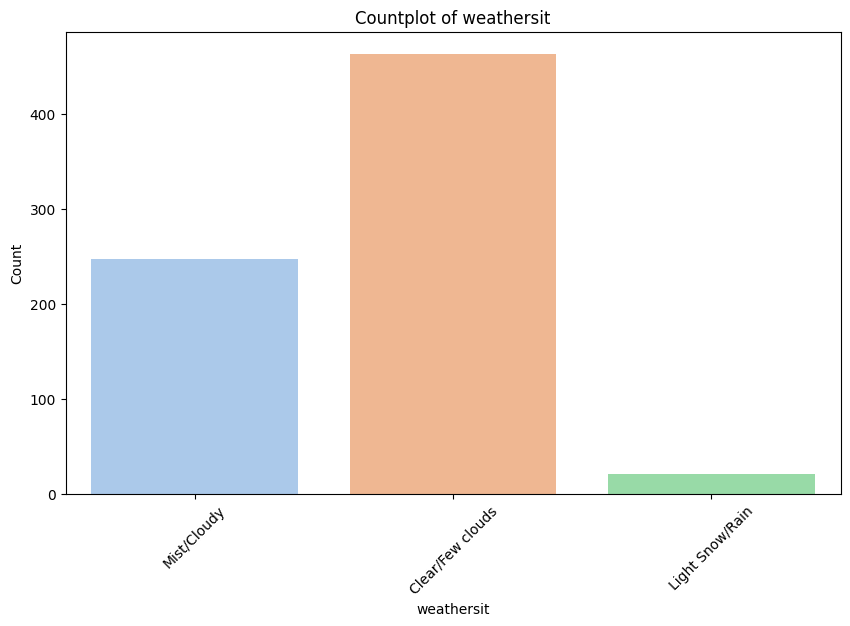

In [7]:
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=day_df, palette='pastel')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

5.3. Multivariate Analysis: Korelasi antar fitur numerik

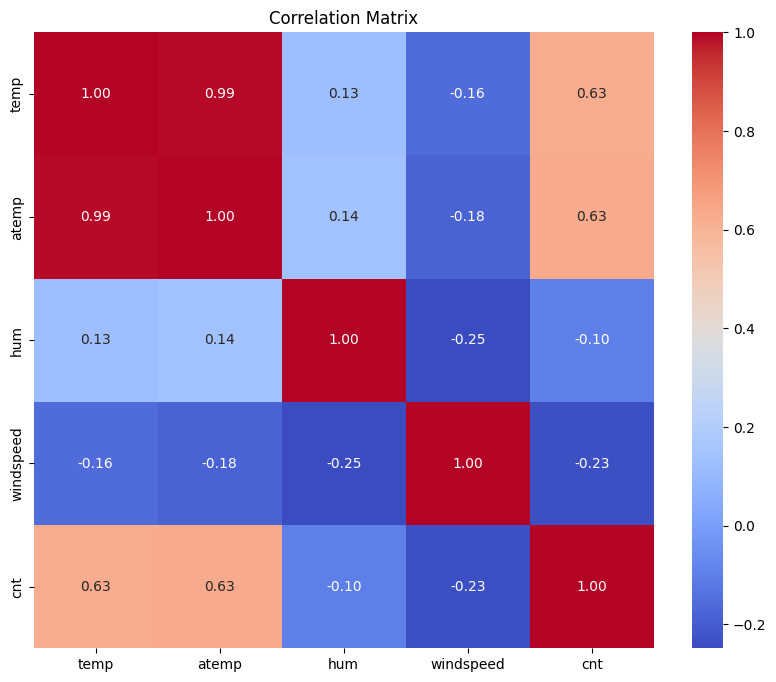

In [8]:
# Korelasi fitur numerik
plt.figure(figsize=(10, 8))
corr = day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

5.4. Multivariate Analysis: Relasi antar variabel

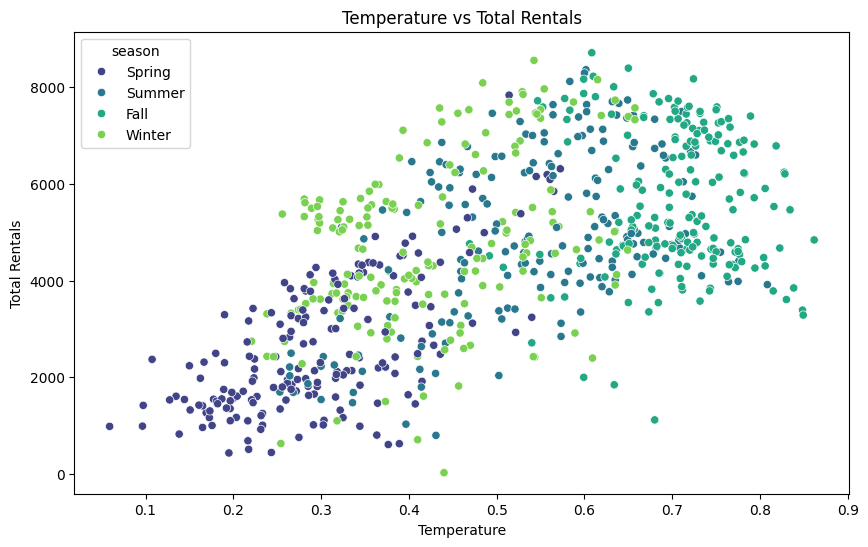

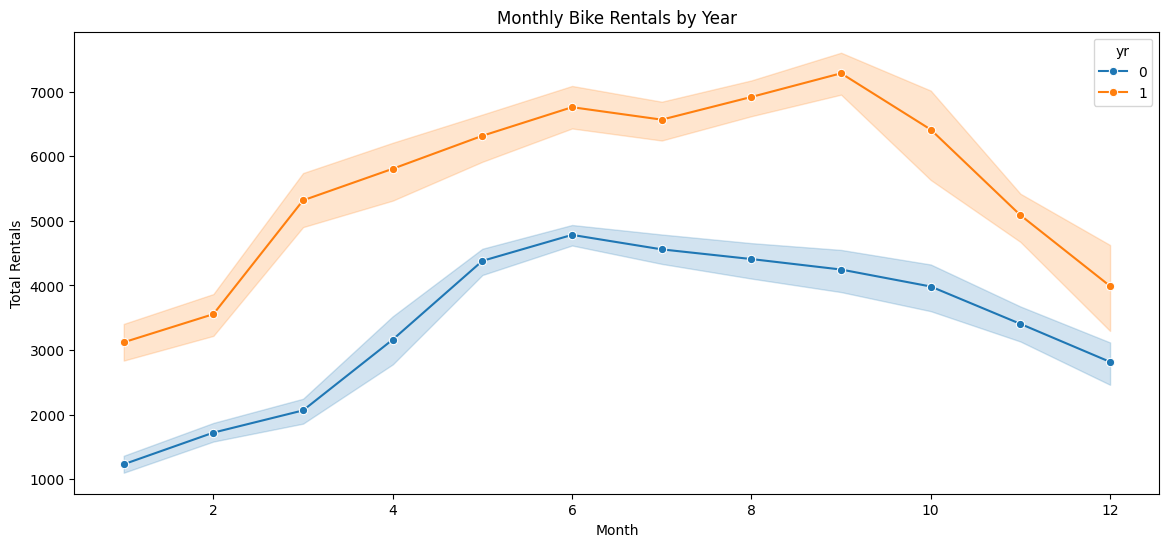

In [9]:
# Relasi suhu dengan jumlah sewa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, hue='season', palette='viridis')
plt.title('Temperature vs Total Rentals')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

# Tren penyewaan berdasarkan bulan dan tahun
plt.figure(figsize=(14, 6))
sns.lineplot(x='mnth', y='cnt', data=day_df, hue='yr', marker='o')
plt.title('Monthly Bike Rentals by Year')
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.show()

5.5. Boxplot Analysis untuk melihat outlier dan pola distribusi

<ipython-input-10-187038635876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, estimator='mean', ci=None)


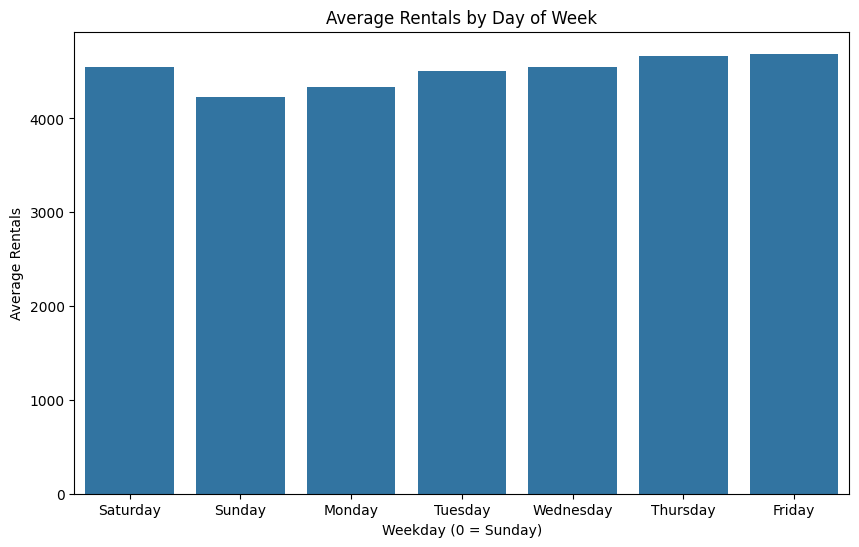

<ipython-input-10-187038635876>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=day_df, estimator='mean', ci=None)


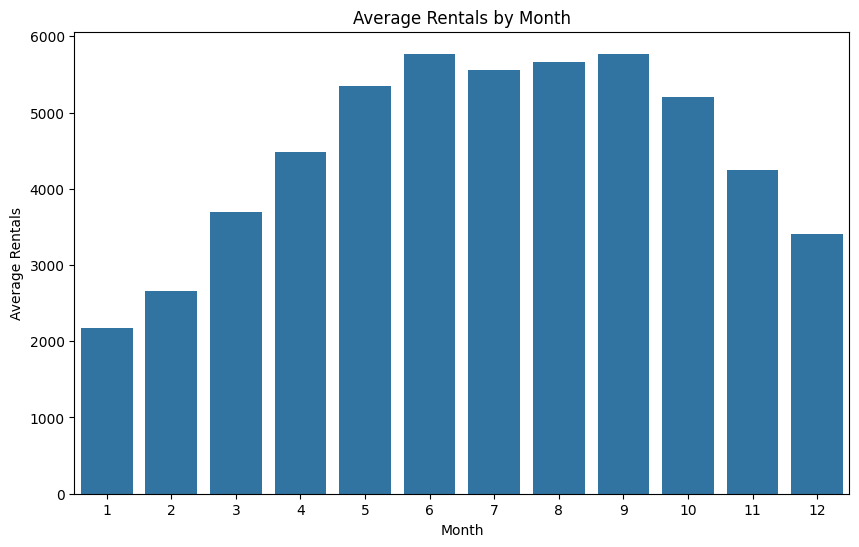

In [10]:
# Rata-rata penyewaan per hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator='mean', ci=None)
plt.title('Average Rentals by Day of Week')
plt.xlabel('Weekday (0 = Sunday)')
plt.ylabel('Average Rentals')
plt.show()

# Rata-rata penyewaan per bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=day_df, estimator='mean', ci=None)
plt.title('Average Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.show()

5.6. Aggregasi Data: Melihat tren berdasarkan waktu

<ipython-input-11-187038635876>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=day_df, estimator='mean', ci=None)


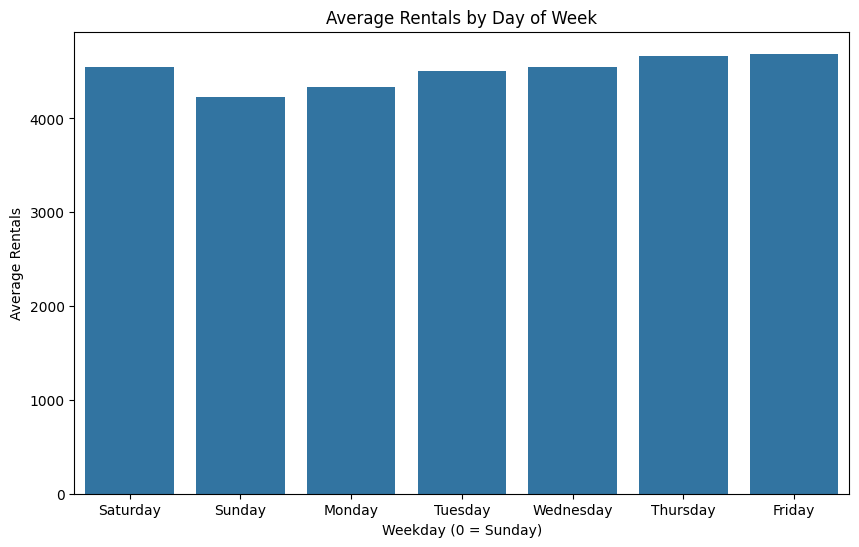

<ipython-input-11-187038635876>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=day_df, estimator='mean', ci=None)


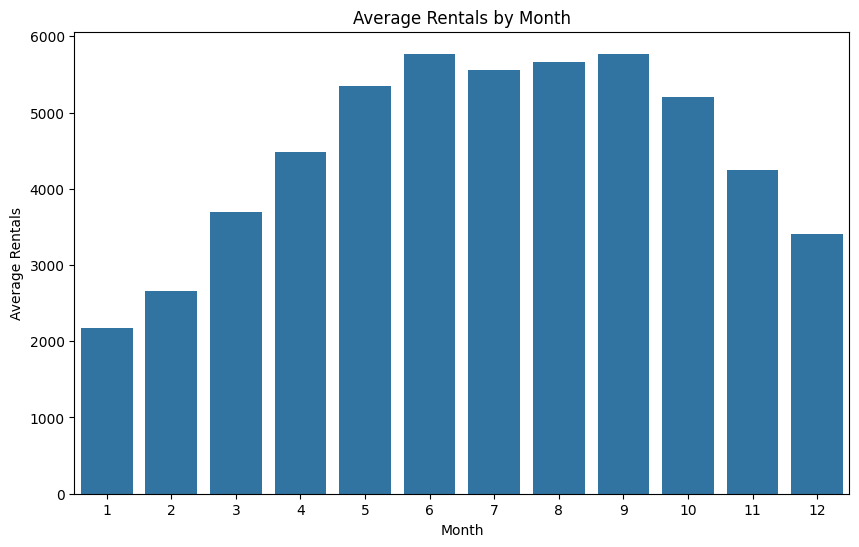

In [11]:
# Rata-rata penyewaan per hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator='mean', ci=None)
plt.title('Average Rentals by Day of Week')
plt.xlabel('Weekday (0 = Sunday)')
plt.ylabel('Average Rentals')
plt.show()

# Rata-rata penyewaan per bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='mnth', y='cnt', data=day_df, estimator='mean', ci=None)
plt.title('Average Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim (season) dan cuaca (weather situation)?

<ipython-input-12-53e7f6ecd823>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='cnt', data=day_df, estimator=np.mean, ci=None)
<ipython-input-12-53e7f6ecd823>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=np.mean, ci=None)


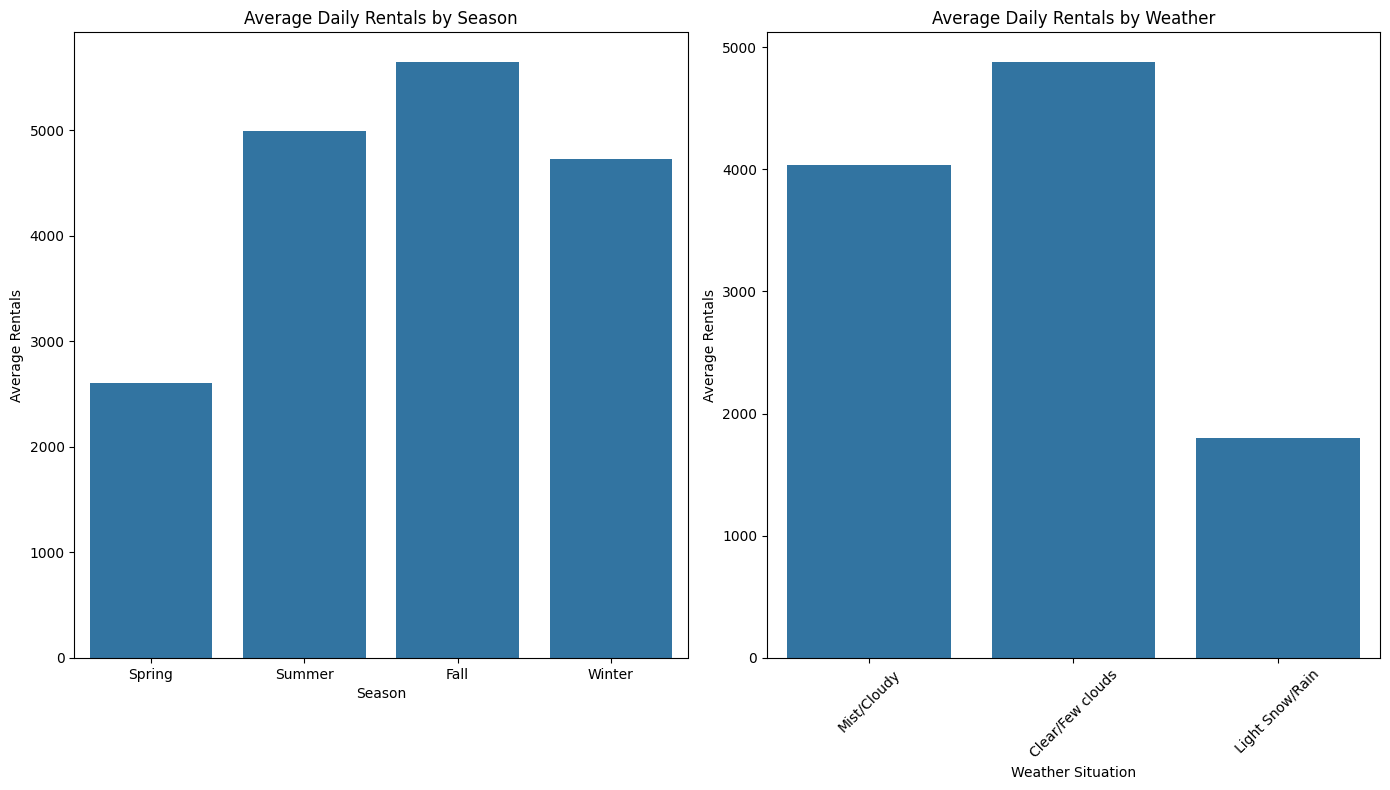

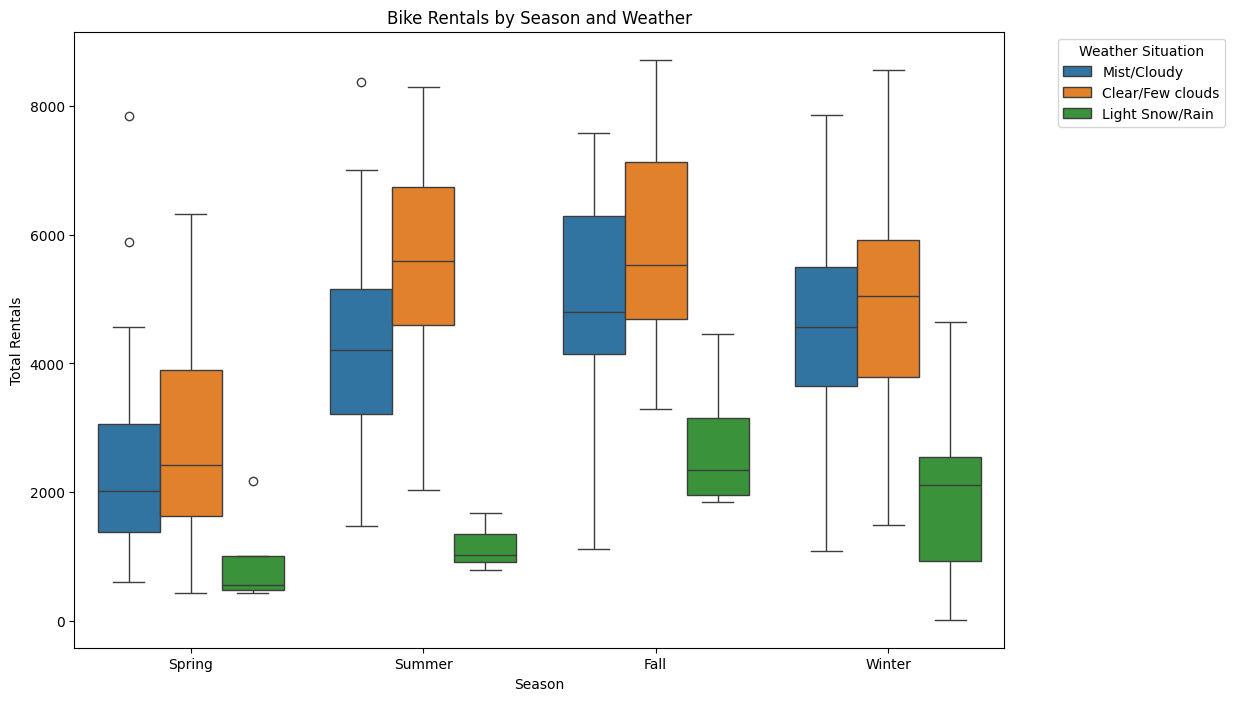

In [ ]:
# Visualization for season and weather impact
plt.figure(figsize=(14, 8))

# Season analysis
plt.subplot(1, 2, 1)
sns.barplot(x='season', y='cnt', data=day_df, estimator=np.mean, ci=None)
plt.title('Average Daily Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Rentals')

# Weather analysis
plt.subplot(1, 2, 2)
sns.barplot(x='weathersit', y='cnt', data=day_df, estimator=np.mean, ci=None)
plt.title('Average Daily Rentals by Weather')
plt.xlabel('Weather Situation')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Combined analysis
plt.figure(figsize=(12, 8))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=day_df)
plt.title('Bike Rentals by Season and Weather')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Weather Situation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Insight:

Pola penggunaan sepeda sangat bervariasi berdasarkan musim. Musim gugur (Fall) menunjukkan jumlah penyewaan tertinggi, diikuti oleh musim panas (Summer). Musim semi (Spring) memiliki jumlah penyewaan terendah.

Kondisi cuaca yang cerah atau sedikit awan (Clear/Few clouds) menghasilkan jumlah penyewaan tertinggi. Semakin buruk kondisi cuaca, semakin rendah jumlah penyewaan sepeda.

Kombinasi antara musim gugur dengan cuaca cerah menghasilkan jumlah penyewaan tertinggi.

### Pertanyaan 2: Bagaimana distribusi penjualan sepeda pada rentang waktu A hingga B?

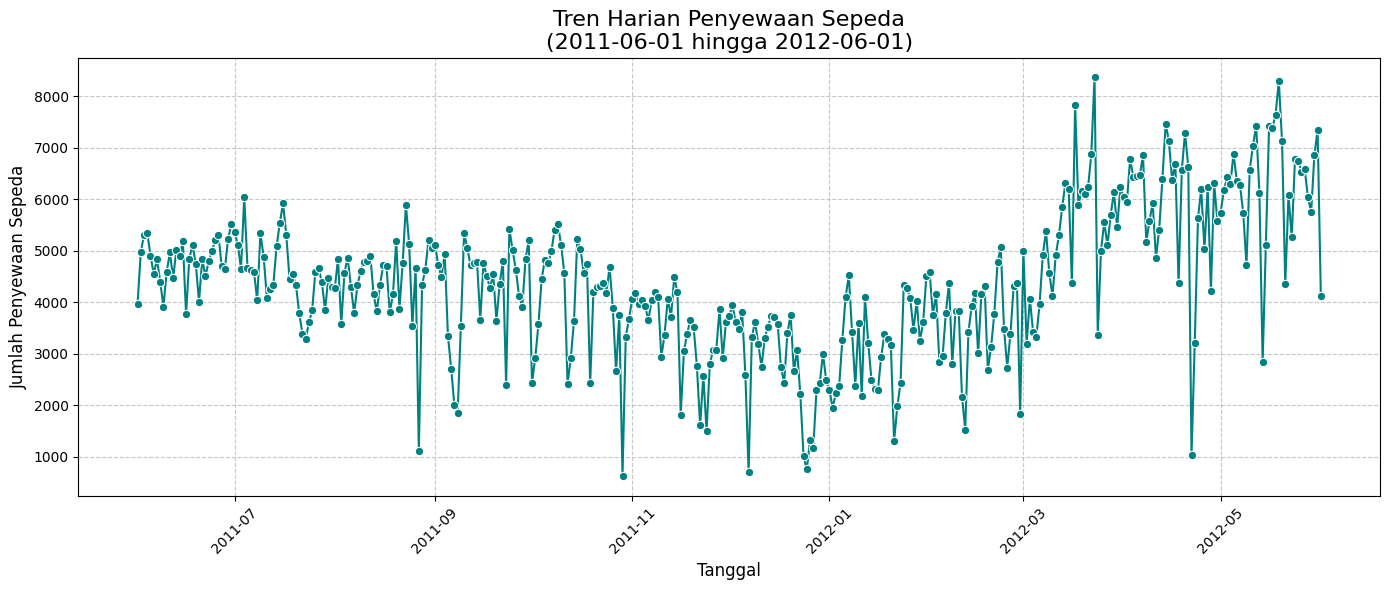

<ipython-input-12-36ddfc5a66f8>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_df, x='year_month', y='cnt', palette='Set2')


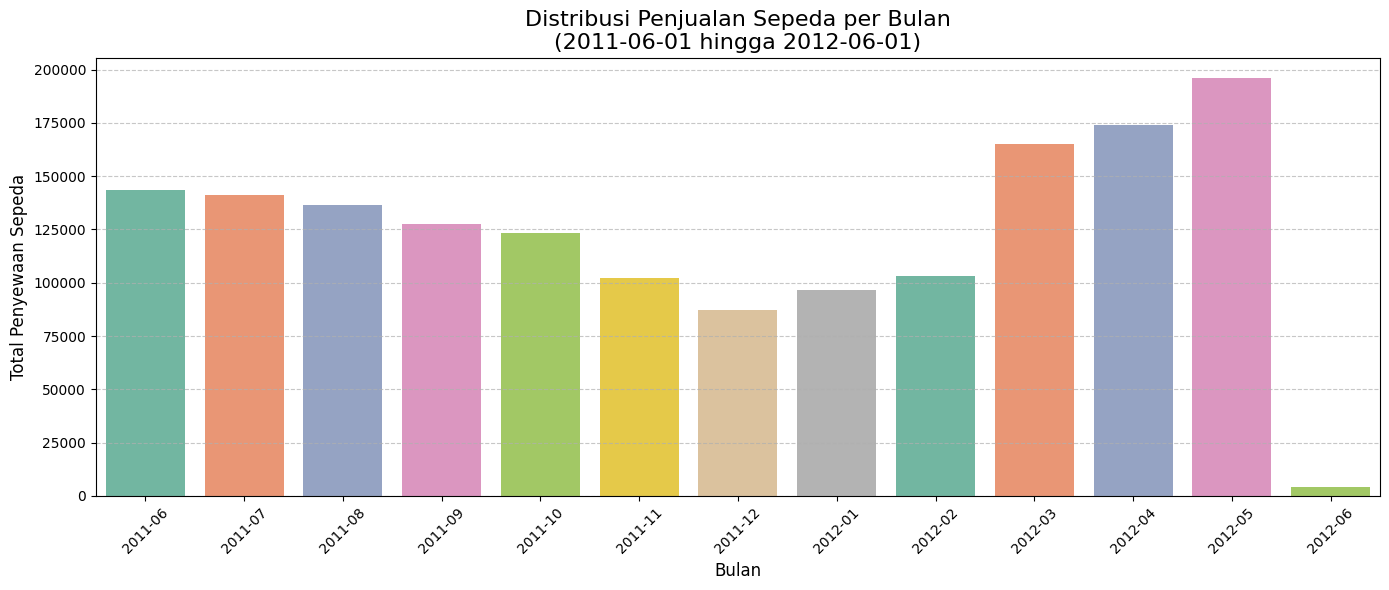

In [12]:
# Pastikan kolom tanggal bertipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Rentang waktu yang ingin dianalisis
start_date = '2011-06-01'
end_date = '2012-06-01'

# Filter data berdasarkan rentang waktu
filtered_df = day_df[(day_df['dteday'] >= start_date) & (day_df['dteday'] <= end_date)].copy()

# -----------------------------
# 1. Visualisasi Tren Harian
# -----------------------------
plt.figure(figsize=(14, 6))
sns.lineplot(data=filtered_df, x='dteday', y='cnt', marker='o', color='teal')
plt.title(f'Tren Harian Penyewaan Sepeda\n({start_date} hingga {end_date})', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -----------------------------
# 2. Visualisasi Agregasi Bulanan
# -----------------------------
filtered_df['year_month'] = filtered_df['dteday'].dt.to_period('M')
monthly_df = filtered_df.groupby('year_month')['cnt'].sum().reset_index()
monthly_df['year_month'] = monthly_df['year_month'].astype(str)  # agar bisa terbaca di x-axis

plt.figure(figsize=(14, 6))
sns.barplot(data=monthly_df, x='year_month', y='cnt', palette='Set2')
plt.title(f'Distribusi Penjualan Sepeda per Bulan\n({start_date} hingga {end_date})', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Penyewaan Sepeda', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analisis Lanjutan (Opsional)

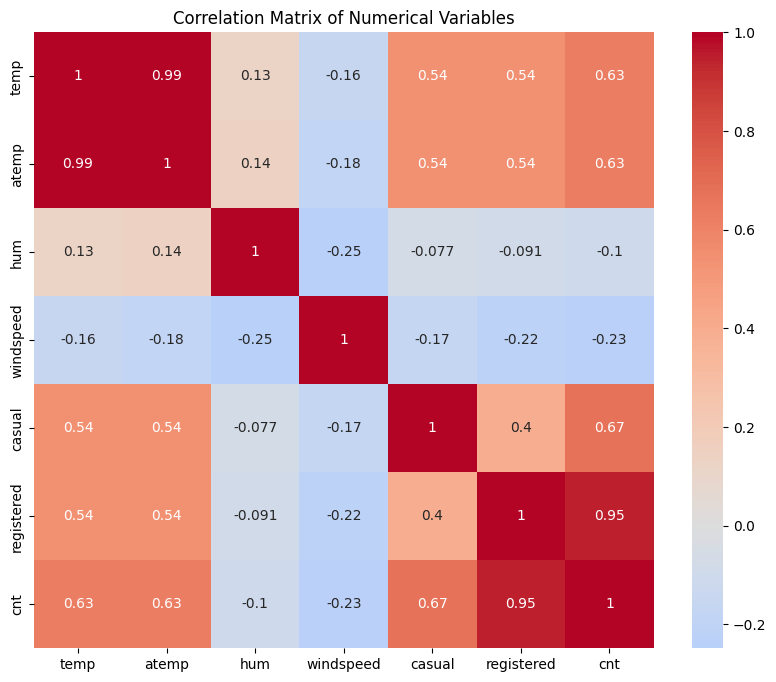

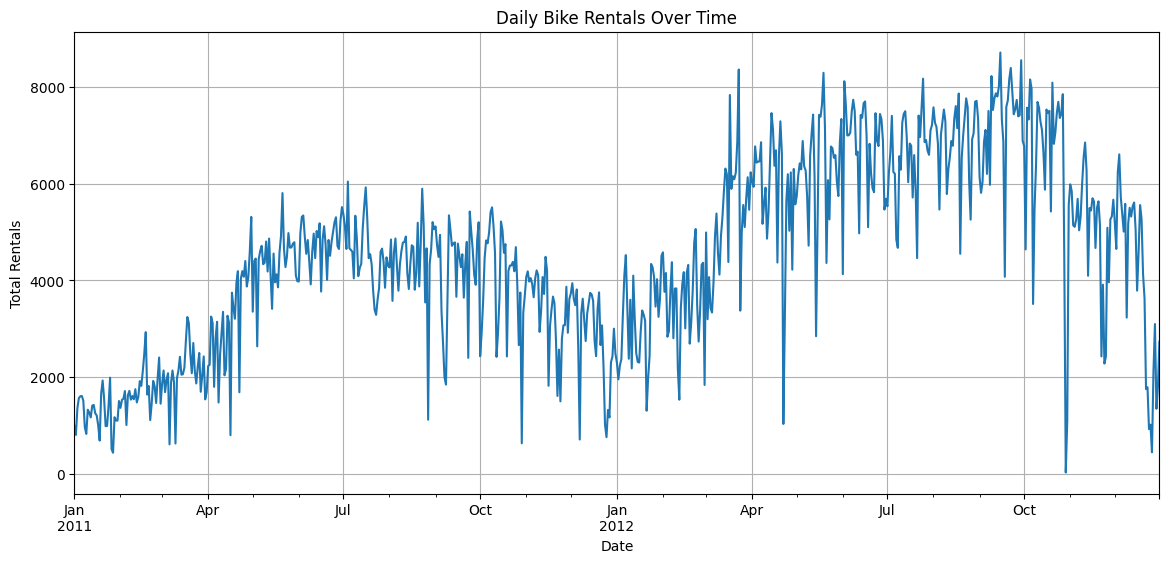

In [13]:
# Correlation analysis
plt.figure(figsize=(10, 8))
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.heatmap(day_df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Time series analysis
plt.figure(figsize=(14, 6))
day_df.set_index('dteday')['cnt'].plot()
plt.title('Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.grid()
plt.show()

## Conclusion

Conclution pertanyaan 1
Pola penggunaan sepeda sangat dipengaruhi oleh faktor musim dan cuaca. Musim gugur (Fall) adalah periode dengan permintaan tertinggi, sementara musim semi (Spring) memiliki permintaan terendah. Kondisi cuaca yang baik (cerah/sedikit awan) secara signifikan meningkatkan jumlah penyewaan sepeda. Rekomendasi untuk bisnis adalah mempersiapkan stok sepeda yang memadai selama musim gugur dan musim panas, serta memberikan promosi selama musim semi untuk meningkatkan permintaan.

Conclution pertanyaan 2
Berdasarkan grafik "Distribusi Penjualan Sepeda per Bulan (2011-06-01 hingga 2012-06-01)", dapat disimpulkan adanya pola musiman yang signifikan dalam penjualan sepeda. Penjualan cenderung rendah pada akhir tahun 2011 (November dan Desember) serta awal tahun 2012 (Januari), kemudian meningkat secara drastis pada bulan-bulan berikutnya seperti Maret, April, dan mencapai puncaknya pada Mei 2012 dengan angka mendekati 200.000 unit. Secara keseluruhan, terlihat tren peningkatan penjualan dari Juni 2011 hingga Mei 2012. Namun, terjadi penurunan yang sangat tajam pada Juni 2012, yang mengindikasikan kemungkinan data tidak lengkap atau adanya faktor eksternal yang memengaruhi penjualan pada bulan tersebut. Grafik ini tidak menyediakan informasi untuk mendukung kesimpulan mengenai perbedaan pola penyewaan sepeda antara hari kerja dan hari libur.